- **Complete Video Tutorial:** https://youtu.be/aLEy3GFGWjQ
- **Download link:** http://archive.ics.uci.edu/ml/machine-learning-databases/00262/

This data set contains a total 5820 evaluation scores provided by students from Gazi University in Ankara (Turkey). There is a total of 28 course specific questions and additional 5 attributes.
- Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("turkiye-student-evaluation_generic.csv")
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [4]:
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

eda

<Axes: xlabel='instr', ylabel='count'>

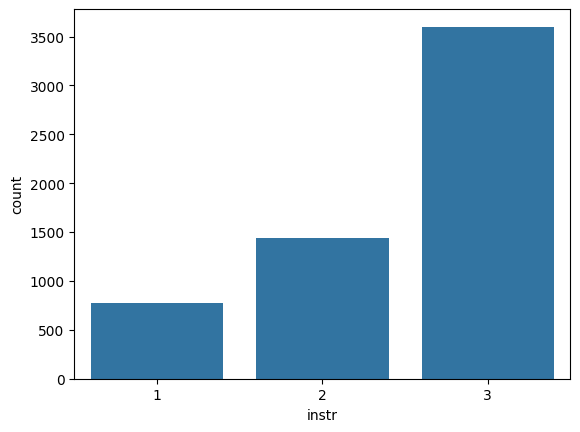

In [7]:
sns.countplot(data=df,x='instr')

<Axes: xlabel='class', ylabel='count'>

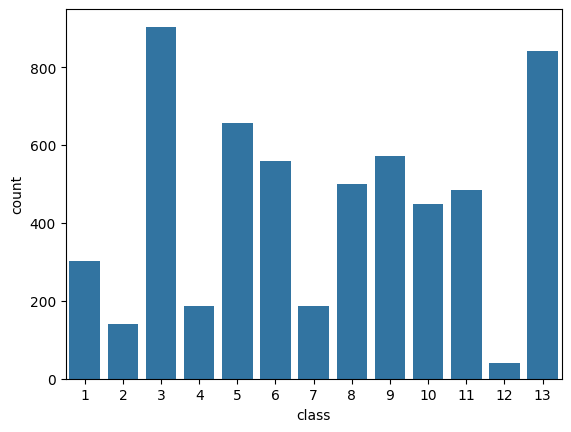

In [8]:
sns.countplot(data=df,x='class')

In [15]:
# find mean of questions
x_questions = df.iloc[:, 5:33]
q_mean = x_questions.mean(axis=0)
total_mean = q_mean.mean()
total_mean

np.float64(3.1861561119293076)

In [16]:
q_mean

Q1     2.929897
Q2     3.073883
Q3     3.178694
Q4     3.082474
Q5     3.105842
Q6     3.107388
Q7     3.066323
Q8     3.041924
Q9     3.165979
Q10    3.090722
Q11    3.183849
Q12    3.035567
Q13    3.242784
Q14    3.290893
Q15    3.287285
Q16    3.169588
Q17    3.398454
Q18    3.222509
Q19    3.261684
Q20    3.285395
Q21    3.307388
Q22    3.317526
Q23    3.201890
Q24    3.166838
Q25    3.312543
Q26    3.222165
Q27    3.154811
Q28    3.308076
dtype: float64

In [17]:
q_mean = q_mean.to_frame('mean')
q_mean.reset_index(level=0, inplace=True)
q_mean.head()

,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842


<Axes: xlabel='index', ylabel='mean'>

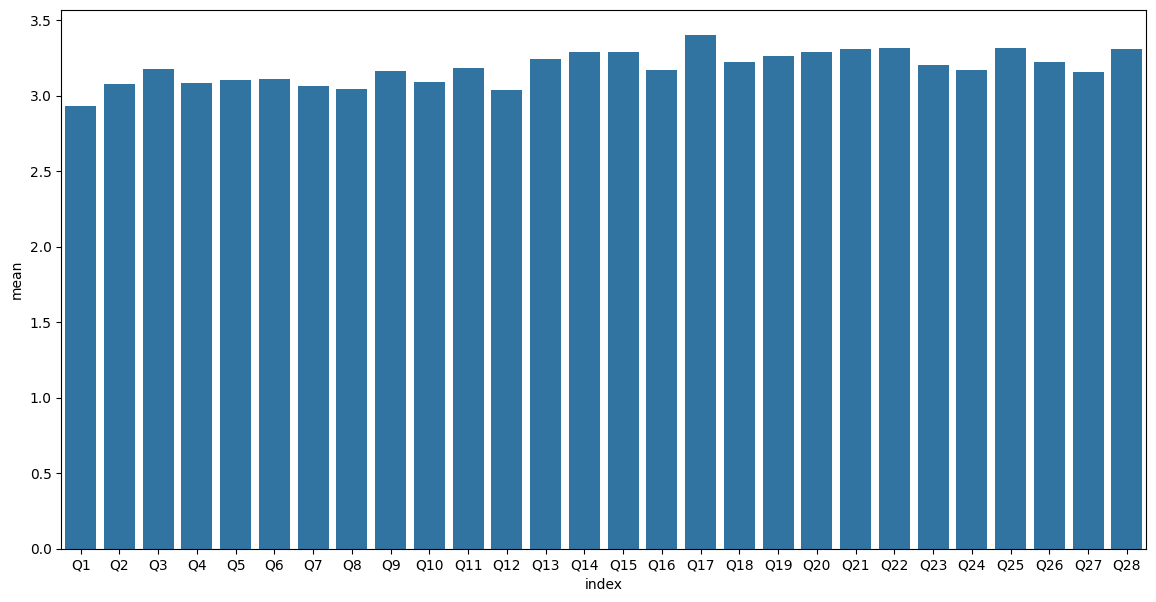

In [18]:
plt.figure(figsize=(14,7))
sns.barplot(x='index', y='mean', data=q_mean)

pca

In [19]:
X = df.iloc[:, 5:33]

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [21]:
X_pca

array([[ -0.98901533,   0.52279815],
       [ -0.98901533,   0.52279815],
       [  9.59128851,   0.6408021 ],
       ...,
       [  9.59128851,   0.6408021 ],
       [-11.56931918,   0.4047942 ],
       [-11.56931918,   0.4047942 ]])

In [22]:
# how much info we retained from the dataset
pca.explained_variance_ratio_.cumsum()[1]

np.float64(0.867138167889108)

model training

In [25]:
# Kmeans clustering
from sklearn.cluster import KMeans
distortions = []
cluster_range = range(1,6)

# elbow method
for i in cluster_range:
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(X_pca)
    distortions.append(model.inertia_)

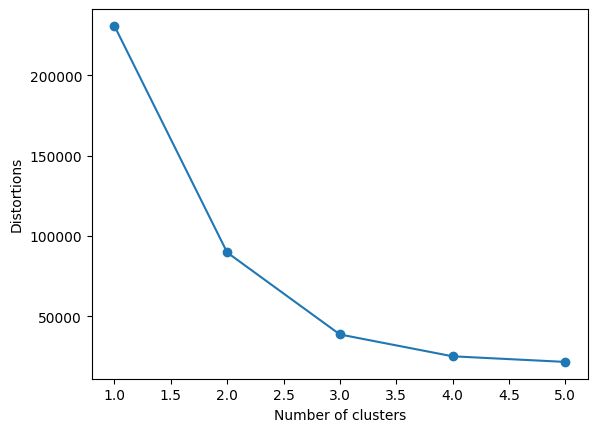

In [26]:
plt.plot(cluster_range, distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel('Distortions')
plt.show()

In [28]:
# use best cluster
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(X_pca)
y = model.predict(X_pca)

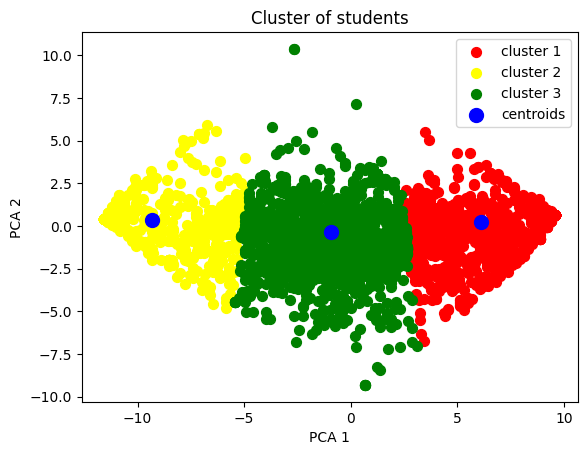

In [30]:
# Scatter Plots for Each Cluster:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50, c='yellow', label='cluster 2')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], s=50, c='green', label='cluster 3')
# These extract the first and second PCA components for the data points assigned to the first cluster (y==0). 
# Similarly, y==1 and y==2 are used for the second and third clusters, respectively.

#Scatter Plot for Cluster Centroids:
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s=100, c='blue', label='centroids')
#These extract the first and second PCA components of the centroids of the clusters.

plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [32]:
from collections import Counter
print(Counter(y))
#  The Counter object counts the number of occurrences of each unique label in y.
# For example, if the output is Counter({0: 50, 1: 30, 2: 20}), 
# it means that there are 50 data points in cluster 0, 30 in cluster 1, and 20 in cluster 2.

Counter({np.int32(2): 2365, np.int32(0): 2225, np.int32(1): 1230})


In [33]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(X)
y = model.predict(X)

In [34]:
Counter(y)

Counter({np.int32(1): 2358, np.int32(0): 2223, np.int32(2): 1239})

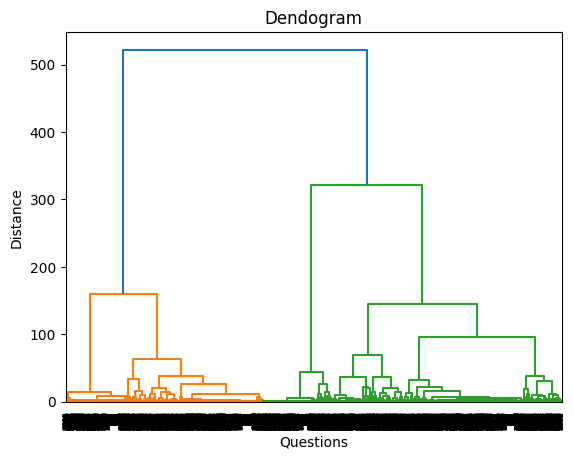

In [35]:
# dendogram
import scipy.cluster.hierarchy as hier
dendogram = hier.dendrogram(hier.linkage(X_pca, method='ward'))
plt.title('Dendogram')
plt.xlabel("Questions")
plt.ylabel("Distance")
plt.show()
# hier.linkage(X_pca, method='ward'): This performs hierarchical clustering on the dataset X_pca using the Ward's method. 
# The Ward's method aims to minimize the variance within clusters and is a popular choice for generating well-defined clusters.
# hier.dendrogram(...): This function creates a dendrogram based on the linkage matrix produced by hier.linkage.

In [37]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
# linkage='ward': Specifies the linkage criterion to use. The Ward's method minimizes the variance of the clusters being merged, 
# which often results in more balanced cluster sizes.
y = model.fit_predict(X_pca)
# Aglomerative clustering is a bottom-up hierarchical clustering approach where each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. 
# The fit_predict method combines the fit and predict steps, making it convenient to obtain the cluster labels directly.

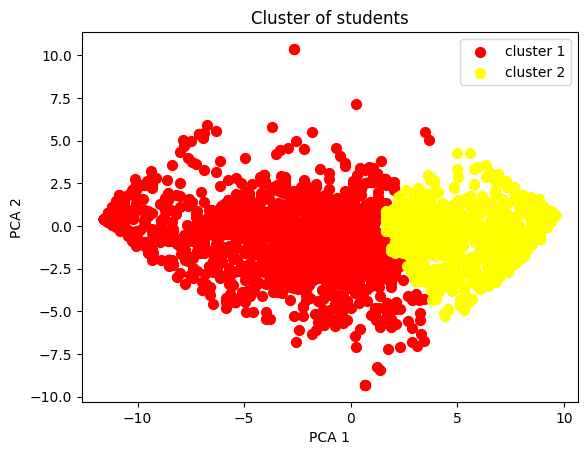

In [38]:
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50, c='yellow', label='cluster 2')
plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [39]:
Counter(y)

Counter({np.int64(0): 3502, np.int64(1): 2318})